# get metabolism-relevant signatures from MSigDB database
For now, take metabolism terms from KEGG

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import csv

read data

In [6]:
out_file_path = './'
gene_signature_dir = out_file_path + 'gene_signatures/'

# human kegg genes from MSigDB

In [9]:
def read_gene_signatures(fpath):
    res_d = {}
    f = open(fpath, "r")
    t = f.readlines()
    for i in t:
        tt = i.split('\t')
        tt[-1] = tt[-1].replace('\n', '')
        res_d[tt[0]] = tt[2:]
    return res_d

In [10]:
# take only kegg for now
c2_kegg_d = read_gene_signatures(gene_signature_dir + 'c2.cp.kegg.v7.5.1.symbols.gmt')

*choose terms related to metabolism*

In [11]:
kegg_keys = pd.Series(c2_kegg_d.keys())
kegg_keys = list(kegg_keys[(kegg_keys.str.contains('METABOLI')) | (kegg_keys.str.contains('MTOR')) | 
         (kegg_keys.str.contains('OXIDATIVE_PHOSPHORYLATION')) | (kegg_keys.str.contains('TCA')) | 
         (kegg_keys.str.contains('SYNTH')) | (kegg_keys.str.contains('DEGRADA')) | 
         (kegg_keys.str.contains('GLYCOLYSIS')) | (kegg_keys.str.contains('PENTOSE')) |
         (kegg_keys.str.contains('CYCLE')) | (kegg_keys.str.contains('PATHWAY'))])

In [12]:
# remove signaling pathway terms
kegg_remove = ['KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
'KEGG_DRUG_METABOLISM_OTHER_ENZYMES',
'KEGG_PPAR_SIGNALING_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'KEGG_ERBB_SIGNALING_PATHWAY',
'KEGG_CALCIUM_SIGNALING_PATHWAY',
'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
'KEGG_CELL_CYCLE',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_WNT_SIGNALING_PATHWAY',
'KEGG_NOTCH_SIGNALING_PATHWAY',
'KEGG_HEDGEHOG_SIGNALING_PATHWAY',
'KEGG_VEGF_SIGNALING_PATHWAY',
'KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY',
'KEGG_NEUROTROPHIN_SIGNALING_PATHWAY',
'KEGG_GNRH_SIGNALING_PATHWAY',
'KEGG_PATHWAYS_IN_CANCER']

In [13]:
kegg_keys = [i for i in kegg_keys if i not in kegg_remove]

In [14]:
# make dictionary combining all keys
kegg_met = {i: c2_kegg_d[i] for i in kegg_keys}
metabolism_sig = {**kegg_met}

In [15]:
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

KEGG_N_GLYCAN_BIOSYNTHESIS: 46
KEGG_OTHER_GLYCAN_DEGRADATION: 16
KEGG_O_GLYCAN_BIOSYNTHESIS: 30
KEGG_GLYCOSAMINOGLYCAN_DEGRADATION: 21
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE: 15
KEGG_GLYCEROLIPID_METABOLISM: 49
KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS: 25
KEGG_GLYCEROPHOSPHOLIPID_METABOLISM: 77
KEGG_ETHER_LIPID_METABOLISM: 33
KEGG_ARACHIDONIC_ACID_METABOLISM: 58
KEGG_LINOLEIC_ACID_METABOLISM: 29
KEGG_ALPHA_LINOLENIC_ACID_METABOLISM: 19
KEGG_SPHINGOLIPID_METABOLISM: 39
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES: 26
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES: 14
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES: 15
KEGG_RIBOFLAVIN_METABOLISM: 16
KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM: 24
KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS: 16
KEGG_AMINOACYL_TRNA_BIOSYNTHESIS: 41
KEGG_GLYCOLYSIS_GLUCONEOGENESIS: 62
KEGG_CITRATE_CYCLE_TCA_CYCLE: 31
KEGG_PENTOSE_PHOSPHATE_PATHWAY: 27
KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS: 28
KEGG_FRUCT

In [19]:
print(f'num of human kegg terms: {len(metabolism_sig.keys())}')

num of human kegg terms: 73


In [17]:
# exmaine similarity of gene signatures
all_d = {}
for key in metabolism_sig:
    d = {}
    for key2 in metabolism_sig:
        if key2 != key:
            overlap_items = [v for v in metabolism_sig[key2] if v in metabolism_sig[key]]
            d[key2] = len(overlap_items) / len(metabolism_sig[key])
        d[key] = 1
    all_d[key] = d
all_d_df = pd.DataFrame(all_d)

<AxesSubplot:>

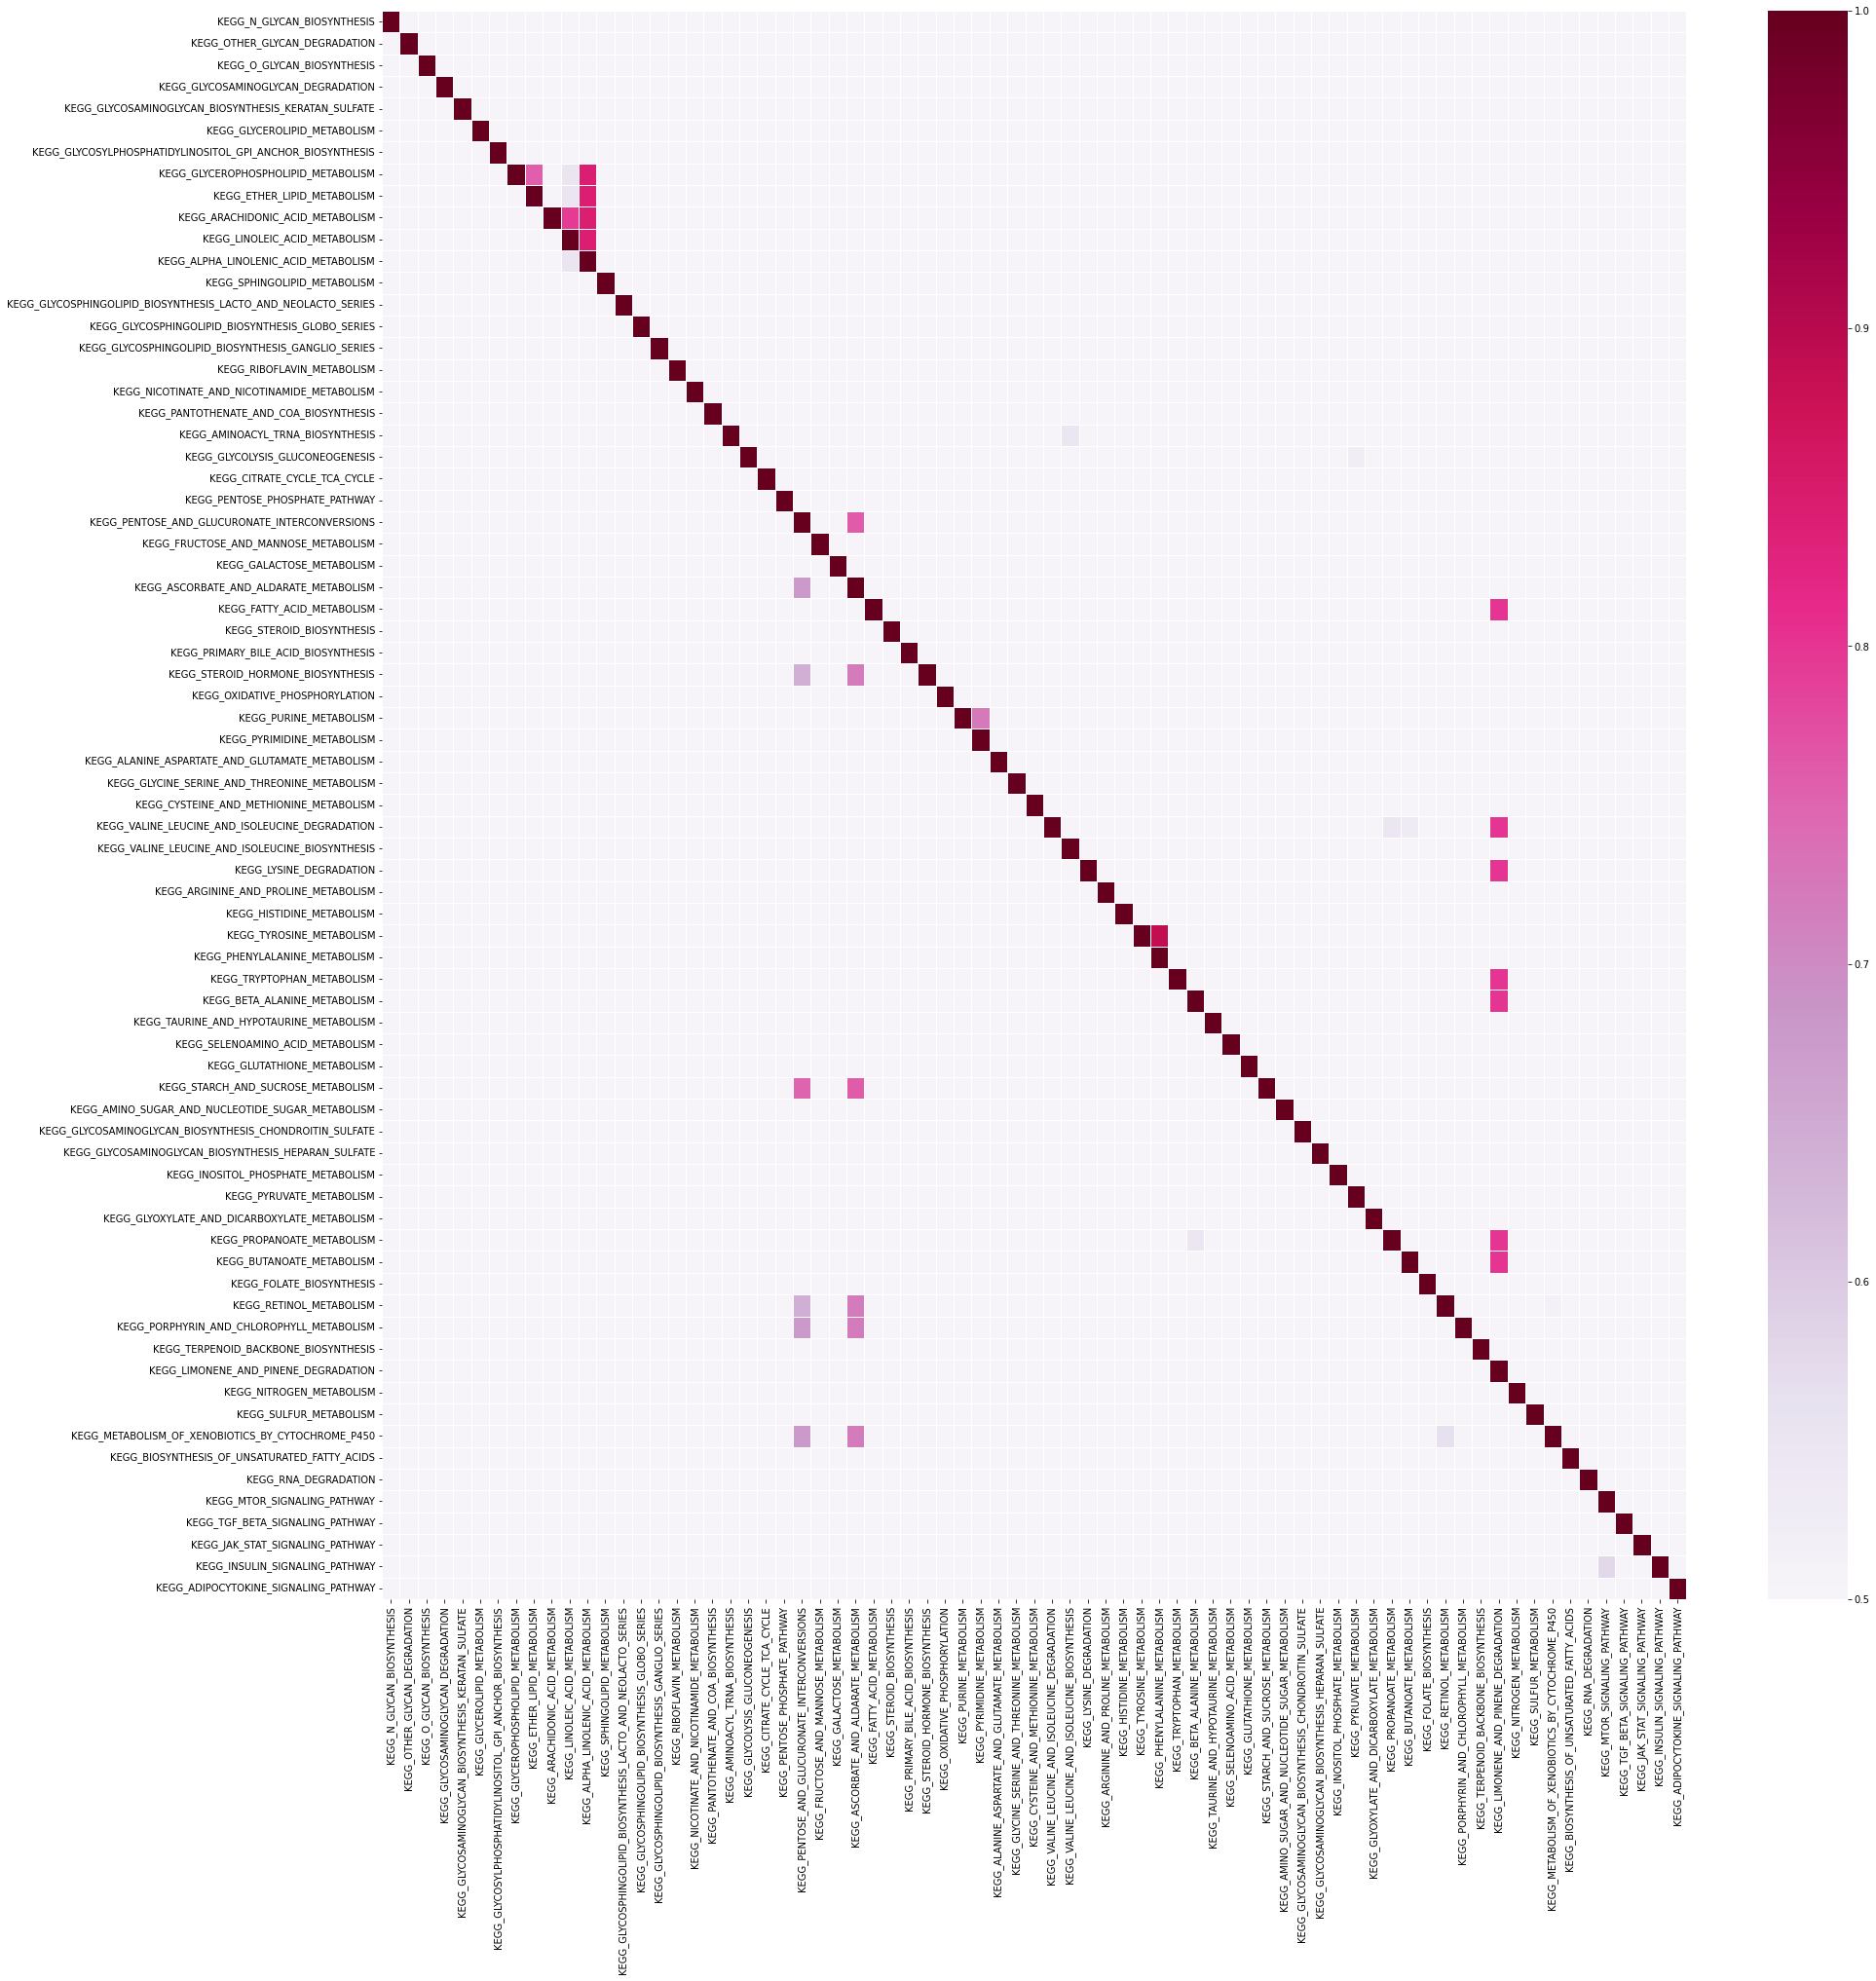

In [18]:
plt.figure(figsize = (30,30))
sns.heatmap(all_d_df, cmap = "PuRd", vmin = 0.5, linewidths = 1)

In [25]:
# save dict of metabolism terms
with open(gene_signature_dir + 'metabolism_terms_msigdb.csv', 'w') as csv_file:
    for key, value in metabolism_sig.items():
        csv_file.write(key)
        for v in value:
            csv_file.write('\t' + v)
        csv_file.write('\n')

In [31]:
out_filename = gene_signature_dir + 'metabolism_terms_msigdb'
joblib.dump(metabolism_sig, out_filename)

['./gene_signatures/metabolism_terms_msigdb']

# repeat above to read in mouse pathway terms
kegg terms from: http://ge-lab.org/gskb/

In [102]:
# from all canoncial pathways
mouse_met = read_gene_signatures(gene_signature_dir + 'MousePath_Metabolic_gmt.gmt')

*choose terms related to metabolism*

In [103]:
mouse_keys = pd.Series([i for i in mouse_met.keys() if 'KEGG' in i])

In [104]:
# apply same filters as to human

#mouse_keys = pd.Series(mouse_met.keys())
mouse_keys_filter = list(mouse_keys[(mouse_keys.str.contains('METABOLI')) | (mouse_keys.str.contains('MTOR')) | 
         (mouse_keys.str.contains('OXIDATIVE_PHOSPHORYLATION')) | (mouse_keys.str.contains('TCA')) | 
         (mouse_keys.str.contains('SYNTH')) | (mouse_keys.str.contains('DEGRADA')) | 
         (mouse_keys.str.contains('GLYCOLYSIS')) | (mouse_keys.str.contains('PENTOSE')) |
         (mouse_keys.str.contains('CYCLE')) | (mouse_keys.str.contains('PATHWAY'))])

In [105]:
print(f'num metabolism terms raw: {len(mouse_keys)}\nnum terms after filtering: {len(mouse_keys_filter)}')

num metabolism terms raw: 259
num terms after filtering: 116


In [106]:
# print the terms removed by filtering
[i for i in mouse_keys if i not in mouse_keys_filter]

['KEGG_MM_FATTY_ACID_ELONGATION',
 'KEGG_MM_UBIQUINONE_AND_OTHER_TERPENOID',
 'KEGG_MM_GLYCOSYLPHOSPHATIDYLINOSITOL',
 'KEGG_MM_ONE_CARBON_POOL_BY_FOLATE',
 'KEGG_MM_ABC_TRANSPORTERS',
 'KEGG_MM_RIBOSOME_BIOGENESIS_IN_EUKARYOTES',
 'KEGG_MM_RIBOSOME',
 'KEGG_MM_RNA_TRANSPORT',
 'KEGG_MM_RNA_POLYMERASE',
 'KEGG_MM_BASAL_TRANSCRIPTION_FACTORS',
 'KEGG_MM_DNA_REPLICATION',
 'KEGG_MM_SPLICEOSOME',
 'KEGG_MM_PROTEASOME',
 'KEGG_MM_PROTEIN_EXPORT',
 'KEGG_MM_BASE_EXCISION_REPAIR',
 'KEGG_MM_NUCLEOTIDE_EXCISION_REPAIR',
 'KEGG_MM_MISMATCH_REPAIR',
 'KEGG_MM_HOMOLOGOUS_RECOMBINATION',
 'KEGG_MM_NON-HOMOLOGOUS_END-JOINING',
 'KEGG_MM_CYTOKINE-CYTOKINE_RECEPTOR_INTERACTION',
 'KEGG_MM_PHOSPHATIDYLINOSITOL_SIGNALING_SYSTEM',
 'KEGG_MM_NEUROACTIVE_LIGAND',
 'KEGG_MM_OOCYTE_MEIOSIS',
 'KEGG_MM_UBIQUITIN_MEDIATED_PROTEOLYSIS',
 'KEGG_MM_SULFUR_RELAY_SYSTEM',
 'KEGG_MM_SNARE_INTERACTIONS_IN_VESICULAR_TRANSPORT',
 'KEGG_MM_REGULATION_OF_AUTOPHAGY',
 'KEGG_MM_PROTEIN_PROCESSING_IN_ENDOPLASMIC_RETICULUM

In [107]:
# remove signaling pathway terms
kegg_remove_mm = ['KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
'KEGG_DRUG_METABOLISM_OTHER_ENZYMES',
'KEGG_PPAR_SIGNALING_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'KEGG_ERBB_SIGNALING_PATHWAY',
'KEGG_CALCIUM_SIGNALING_PATHWAY',
'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
'KEGG_CELL_CYCLE',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_WNT_SIGNALING_PATHWAY',
'KEGG_NOTCH_SIGNALING_PATHWAY',
'KEGG_HEDGEHOG_SIGNALING_PATHWAY',
'KEGG_VEGF_SIGNALING_PATHWAY',
'KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY',
'KEGG_NEUROTROPHIN_SIGNALING_PATHWAY',
'KEGG_GNRH_SIGNALING_PATHWAY',
'KEGG_PATHWAYS_IN_CANCER',
'KEGG_MRNA_SURVEILLANCE_PATHWAY',
'KEGG_FANCONI_ANEMIA_PATHWAY',
'KEGG_RIG-I-LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA-SENSING_PATHWAY',
'KEGG_SYNAPTIC_VESICLE_CYCLE']

kegg_remove_mm = [i.replace('KEGG_', 'KEGG_MM_') for i in kegg_remove_mm]

In [108]:
mouse_keys_filter = [i for i in mouse_keys_filter if i not in kegg_remove_mm]

In [112]:
print(f'num mouse kegg terms: {len(mouse_keys_filter)}\nnum human kegg terms: {len(metabolism_sig.keys())}')

num mouse kegg terms: 92
num human kegg terms: 73


In [43]:
# print terms unique to mouse, not in human
[i for i in mouse_keys_filter if i.replace('KEGG_MM', 'KEGG') not in kegg_keys]

['KEGG_MM_CITRATE_CYCLE',
 'KEGG_MM_FATTY_ACID_BIOSYNTHESIS',
 'KEGG_MM_SYNTHESIS_AND_DEGRADATION_OF_KETONE_BODIES',
 'KEGG_MM_CAFFEINE_METABOLISM',
 'KEGG_MM_LYSINE_BIOSYNTHESIS',
 'KEGG_MM_PHENYLALANINE_TYROSINE_AND_TRYPTOPHAN_BIOSYNTHESIS',
 'KEGG_MM_BETA-ALANINE_METABOLISM',
 'KEGG_MM_SELENOCOMPOUND_METABOLISM',
 'KEGG_MM_CYANOAMINO_ACID_METABOLISM',
 'KEGG_MM_D-GLUTAMINE_AND_D-GLUTAMATE_METABOLISM',
 'KEGG_MM_D-ARGININE_AND_D-ORNITHINE_METABOLISM',
 'KEGG_MM_N-GLYCAN_BIOSYNTHESIS',
 'KEGG_MM_MUCIN_TYPE_O-GLYCAN_BIOSYNTHESIS',
 'KEGG_MM_OTHER_TYPES_OF_O-GLYCAN_BIOSYNTHESIS',
 'KEGG_MM_BUTIROSIN_AND_NEOMYCIN_BIOSYNTHESIS',
 'KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_DERMATAN_SULFATE',
 'KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE_HEPARIN',
 'KEGG_MM_ALPHA-LINOLENIC_ACID_METABOLISM',
 'KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_NEOLACTO_SERIES',
 'KEGG_MM_THIAMINE_METABOLISM',
 'KEGG_MM_VITAMIN_B6_METABOLISM',
 'KEGG_MM_BIOTIN_METABOLISM',
 'KEGG_MM_LIPOIC_ACID_

In [113]:
# print terms unique to human, not in mouse
[i for i in kegg_keys if i.replace('KEGG_', 'KEGG_MM_') not in mouse_keys_filter]

['KEGG_N_GLYCAN_BIOSYNTHESIS',
 'KEGG_O_GLYCAN_BIOSYNTHESIS',
 'KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS',
 'KEGG_ALPHA_LINOLENIC_ACID_METABOLISM',
 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES',
 'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS',
 'KEGG_CITRATE_CYCLE_TCA_CYCLE',
 'KEGG_BETA_ALANINE_METABOLISM',
 'KEGG_SELENOAMINO_ACID_METABOLISM',
 'KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE',
 'KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE',
 'KEGG_LIMONENE_AND_PINENE_DEGRADATION',
 'KEGG_NITROGEN_METABOLISM',
 'KEGG_TGF_BETA_SIGNALING_PATHWAY',
 'KEGG_JAK_STAT_SIGNALING_PATHWAY']

In [114]:
# make dictionary combining all keys
mouse_met_d = {i: mouse_met[i] for i in mouse_keys_filter}
metabolism_sig_mouse = {**mouse_met_d}

In [115]:
for k,v in metabolism_sig_mouse.items():
    print(f'{k}: {len(v)}')

KEGG_MM_GLYCOLYSIS_GLUCONEOGENESIS: 66
KEGG_MM_CITRATE_CYCLE: 33
KEGG_MM_PENTOSE_PHOSPHATE_PATHWAY: 30
KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS: 34
KEGG_MM_FRUCTOSE_AND_MANNOSE_METABOLISM: 40
KEGG_MM_GALACTOSE_METABOLISM: 31
KEGG_MM_ASCORBATE_AND_ALDARATE_METABOLISM: 27
KEGG_MM_FATTY_ACID_BIOSYNTHESIS: 6
KEGG_MM_FATTY_ACID_METABOLISM: 48
KEGG_MM_SYNTHESIS_AND_DEGRADATION_OF_KETONE_BODIES: 11
KEGG_MM_STEROID_BIOSYNTHESIS: 17
KEGG_MM_PRIMARY_BILE_ACID_BIOSYNTHESIS: 16
KEGG_MM_STEROID_HORMONE_BIOSYNTHESIS: 58
KEGG_MM_OXIDATIVE_PHOSPHORYLATION: 142
KEGG_MM_PURINE_METABOLISM: 170
KEGG_MM_CAFFEINE_METABOLISM: 9
KEGG_MM_PYRIMIDINE_METABOLISM: 100
KEGG_MM_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM: 35
KEGG_MM_GLYCINE_SERINE_AND_THREONINE_METABOLISM: 39
KEGG_MM_CYSTEINE_AND_METHIONINE_METABOLISM: 39
KEGG_MM_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION: 53
KEGG_MM_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS: 2
KEGG_MM_LYSINE_BIOSYNTHESIS: 5
KEGG_MM_LYSINE_DEGRADATION: 48
KEGG_MM_ARGININE_AND

In [116]:
print(f'num mouse kegg terms final: {len(metabolism_sig_mouse.keys())}')

num mouse kegg terms final: 92


<AxesSubplot:>

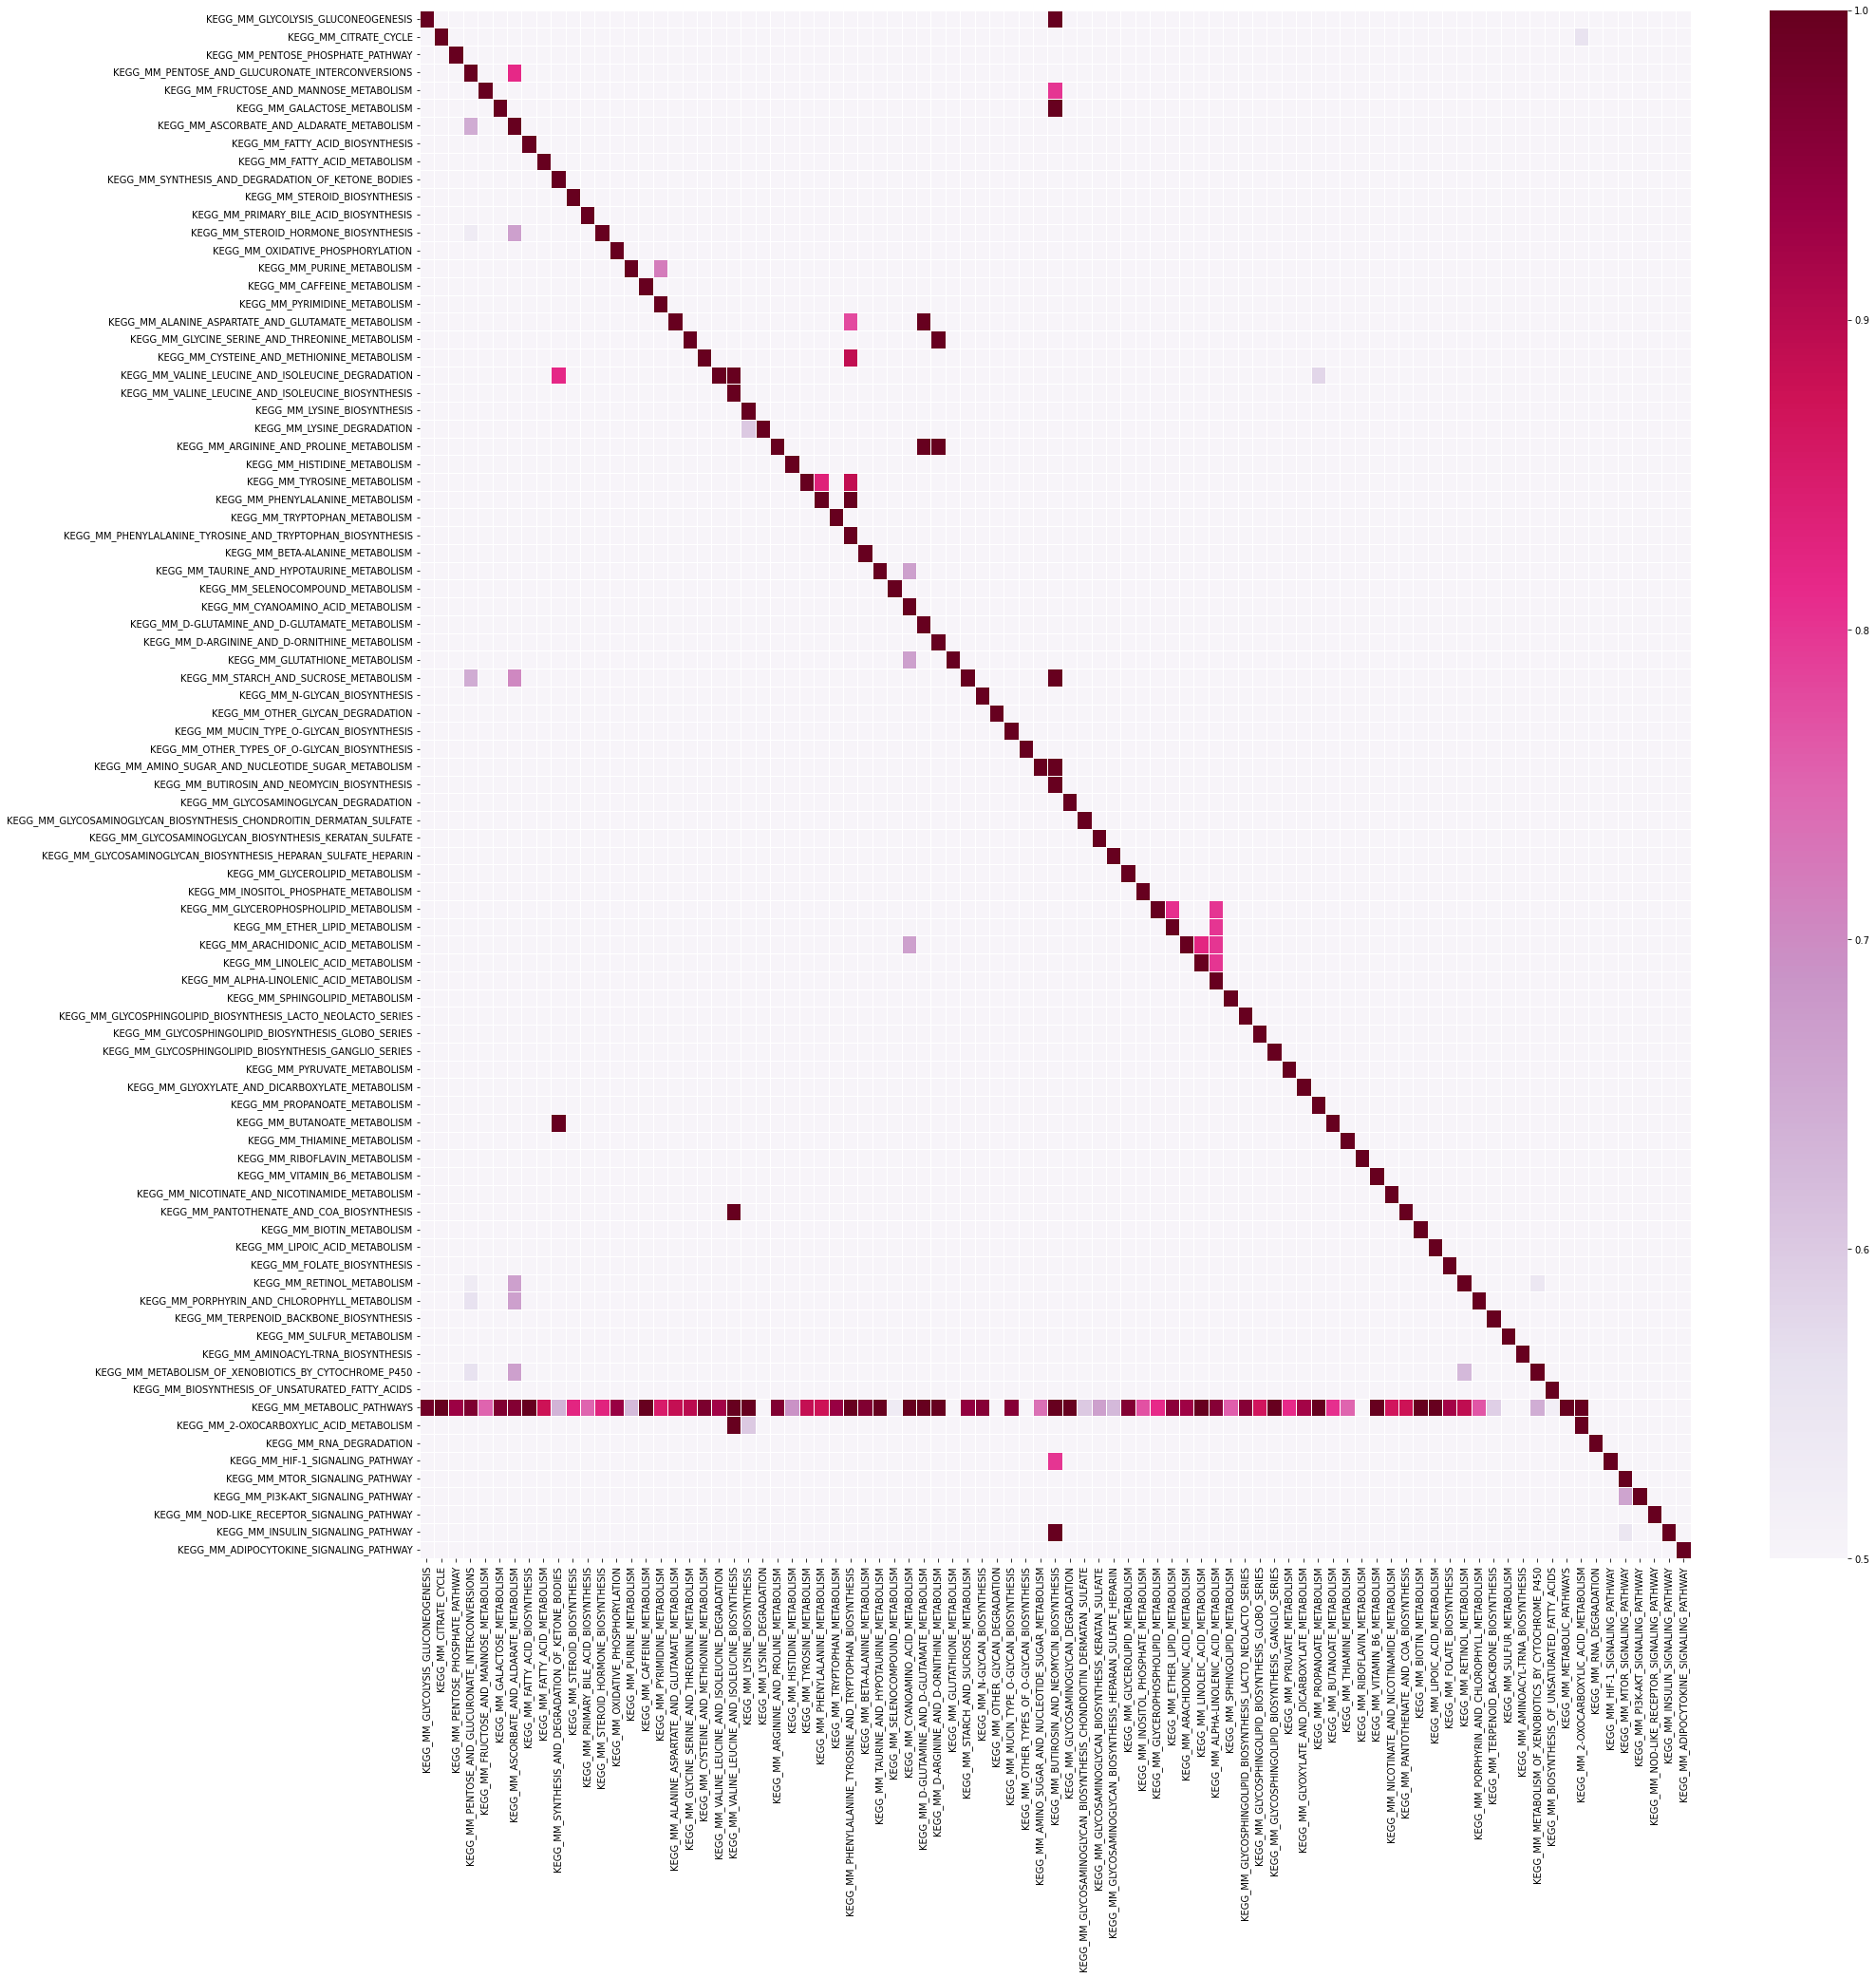

In [100]:
# exmaine similarity of gene signatures
all_d = {}
for key in metabolism_sig_mouse:
    d = {}
    for key2 in metabolism_sig_mouse:
        if key2 != key:
            overlap_items = [v for v in metabolism_sig_mouse[key2] if v in metabolism_sig_mouse[key]]
            d[key2] = len(overlap_items) / len(metabolism_sig_mouse[key])
        d[key] = 1
    all_d[key] = d
all_d_df = pd.DataFrame(all_d)

plt.figure(figsize = (30,30))
sns.heatmap(all_d_df, cmap = "PuRd", vmin = 0.5, linewidths = 1)

In [48]:
out_filename = gene_signature_dir + 'metabolism_terms_mouse.pickle'
t = joblib.load(out_filename)

In [ ]:
# need to resave

In [101]:
# save dict of metabolism terms
with open(gene_signature_dir + 'metabolism_terms_mouse.csv', 'w') as csv_file:
    for key, value in metabolism_sig_mouse.items():
        csv_file.write(key)
        for v in value:
            csv_file.write('\t' + v)
        csv_file.write('\n')

In [102]:
out_filename = gene_signature_dir + 'metabolism_terms_mouse.pickle'
joblib.dump(metabolism_sig_mouse, out_filename)

['./gene_signatures/metabolism_terms_mouse.pickle']

# mouse kegg genes
downloaded by Sarah

In [165]:
mouse_met_2 = pd.read_csv(gene_signature_dir + 'final.mmu.kegg.genes.pathways.csv')
mouse_met_2

,pathway,ncbi_id,name,ensembl_id
0,Glycolysis / Gluconeogenesis - Mus musculus (h...,103988,Gck,ENSMUSG00000041798
1,Glycolysis / Gluconeogenesis - Mus musculus (h...,106557,Ldhal6b,ENSMUSG00000101959
2,Glycolysis / Gluconeogenesis - Mus musculus (h...,110695,Aldh7a1,ENSMUSG00000053644
3,Glycolysis / Gluconeogenesis - Mus musculus (h...,11522,Adh1,ENSMUSG00000074207
4,Glycolysis / Gluconeogenesis - Mus musculus (h...,11529,Adh7,ENSMUSG00000055301
...,...,...,...,...
36890,Fluid shear stress and atherosclerosis - Mus m...,723893,Mir10a,ENSMUSG00000065519
36891,Fluid shear stress and atherosclerosis - Mus m...,74769,Pik3cb,ENSMUSG00000032462
36892,Fluid shear stress and atherosclerosis - Mus m...,75600,Calml4,ENSMUSG00000032246
36893,Fluid shear stress and atherosclerosis - Mus m...,75886,Gstt4,ENSMUSG00000009093


In [166]:
mouse_met_2_terms_all = {}
for g in mouse_met_2.groupby('pathway'):
    k = g[0].replace(' - Mus musculus (house mouse)', '')
    k = k.upper()
    k = k.replace(' ', '_')
    k = k.replace('/_', '')
    k = k.replace('-_', '')
    k = 'KEGG_MM_' + k
    mouse_met_2_terms_all[k] = list(g[1]['name'].str.upper())

In [167]:
mouse_keys = pd.Series(mouse_met_2_terms_all.keys())
# apply filters
mouse_keys_filter = list(mouse_keys[(mouse_keys.str.contains('METABOLI')) | (mouse_keys.str.contains('MTOR')) | 
         (mouse_keys.str.contains('OXIDATIVE_PHOSPHORYLATION')) | (mouse_keys.str.contains('TCA')) | 
         (mouse_keys.str.contains('SYNTH')) | (mouse_keys.str.contains('DEGRADA')) | 
         (mouse_keys.str.contains('GLYCOLYSIS')) | (mouse_keys.str.contains('PENTOSE')) |
         (mouse_keys.str.contains('CYCLE')) | (mouse_keys.str.contains('PATHWAY'))])

In [168]:
print(f'num metabolism terms raw: {len(mouse_keys)}\nnum terms after filtering: {len(mouse_keys_filter)}')

num metabolism terms raw: 343
num terms after filtering: 159


In [169]:
# print the terms removed by filtering
[i for i in mouse_keys if i not in mouse_keys_filter]

['KEGG_MM_ABC_TRANSPORTERS',
 'KEGG_MM_ACUTE_MYELOID_LEUKEMIA',
 'KEGG_MM_ADHERENS_JUNCTION',
 'KEGG_MM_ADRENERGIC_SIGNALING_IN_CARDIOMYOCYTES',
 'KEGG_MM_AFRICAN_TRYPANOSOMIASIS',
 'KEGG_MM_ALCOHOLIC_LIVER_DISEASE',
 'KEGG_MM_ALCOHOLISM',
 'KEGG_MM_ALDOSTERONE-REGULATED_SODIUM_REABSORPTION',
 'KEGG_MM_ALLOGRAFT_REJECTION',
 'KEGG_MM_ALZHEIMER_DISEASE',
 'KEGG_MM_AMOEBIASIS',
 'KEGG_MM_AMPHETAMINE_ADDICTION',
 'KEGG_MM_AMYOTROPHIC_LATERAL_SCLEROSIS',
 'KEGG_MM_ANTIFOLATE_RESISTANCE',
 'KEGG_MM_ANTIGEN_PROCESSING_AND_PRESENTATION',
 'KEGG_MM_APOPTOSIS',
 'KEGG_MM_APOPTOSIS_MULTIPLE_SPECIES',
 'KEGG_MM_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY',
 'KEGG_MM_ASTHMA',
 'KEGG_MM_AUTOIMMUNE_THYROID_DISEASE',
 'KEGG_MM_AUTOPHAGY_ANIMAL',
 'KEGG_MM_AUTOPHAGY_OTHER',
 'KEGG_MM_AXON_GUIDANCE',
 'KEGG_MM_BACTERIAL_INVASION_OF_EPITHELIAL_CELLS',
 'KEGG_MM_BASAL_CELL_CARCINOMA',
 'KEGG_MM_BASAL_TRANSCRIPTION_FACTORS',
 'KEGG_MM_BASE_EXCISION_REPAIR',
 'KEGG_MM_BILE_SECRETION',
 'KEGG_MM_BLADDER

In [170]:
# remove signaling pathway terms -- copy from aboev
kegg_remove_mm = ['KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
'KEGG_DRUG_METABOLISM_OTHER_ENZYMES',
'KEGG_PPAR_SIGNALING_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'KEGG_ERBB_SIGNALING_PATHWAY',
'KEGG_CALCIUM_SIGNALING_PATHWAY',
'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
'KEGG_CELL_CYCLE',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_WNT_SIGNALING_PATHWAY',
'KEGG_NOTCH_SIGNALING_PATHWAY',
'KEGG_HEDGEHOG_SIGNALING_PATHWAY',
'KEGG_VEGF_SIGNALING_PATHWAY',
'KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY',
'KEGG_NEUROTROPHIN_SIGNALING_PATHWAY',
'KEGG_GNRH_SIGNALING_PATHWAY',
'KEGG_PATHWAYS_IN_CANCER',
'KEGG_MRNA_SURVEILLANCE_PATHWAY',
'KEGG_FANCONI_ANEMIA_PATHWAY',
'KEGG_RIG-I-LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA-SENSING_PATHWAY',
'KEGG_SYNAPTIC_VESICLE_CYCLE']

kegg_remove_mm_2 = ['KEGG_MM_HIPPO_SIGNALING_PATHWAY_MULTIPLE_SPECIES',
                    'KEGG_MM_LONGEVITY_REGULATING_PATHWAY_MULTIPLE_SPECIES',
                    'KEGG_MM_PD-L1_EXPRESSION_AND_PD-1_CHECKPOINT_PATHWAY_IN_CANCER',
                    'KEGG_MM_RELAXIN_SIGNALING_PATHWAY',
                    'KEGG_MM_SIGNALING_PATHWAYS_REGULATING_PLURIPOTENCY_OF_STEM_CELLS',
                    'KEGG_MM_VIRAL_LIFE_CYCLE_HIV-1']

In [171]:
kegg_remove_mm = [i.replace('KEGG_', 'KEGG_MM_') for i in kegg_remove_mm] + kegg_remove_mm_2

In [172]:
mouse_keys_filter = [i for i in mouse_keys_filter if i not in kegg_remove_mm]

In [173]:
print(f'num new mouse terms: {len(mouse_keys_filter)}\nnum prev mouse terms: {len(metabolism_sig_mouse.keys())}\nnum human terms: {len(metabolism_sig.keys())}')

num new mouse terms: 129
num prev mouse terms: 92
num human terms: 73


In [174]:
[i for i in mouse_keys_filter if i not in metabolism_sig_mouse.keys()]

['KEGG_MM_AGE-RAGE_SIGNALING_PATHWAY_IN_DIABETIC_COMPLICATIONS',
 'KEGG_MM_AMPK_SIGNALING_PATHWAY',
 'KEGG_MM_ALDOSTERONE_SYNTHESIS_AND_SECRETION',
 'KEGG_MM_APELIN_SIGNALING_PATHWAY',
 'KEGG_MM_ARGININE_BIOSYNTHESIS',
 'KEGG_MM_BIOSYNTHESIS_OF_AMINO_ACIDS',
 'KEGG_MM_BIOSYNTHESIS_OF_COFACTORS',
 'KEGG_MM_BIOSYNTHESIS_OF_NUCLEOTIDE_SUGARS',
 'KEGG_MM_C-TYPE_LECTIN_RECEPTOR_SIGNALING_PATHWAY',
 'KEGG_MM_CARBON_METABOLISM',
 'KEGG_MM_CENTRAL_CARBON_METABOLISM_IN_CANCER',
 'KEGG_MM_CHOLESTEROL_METABOLISM',
 'KEGG_MM_CHOLINE_METABOLISM_IN_CANCER',
 'KEGG_MM_CITRATE_CYCLE_(TCA_CYCLE)',
 'KEGG_MM_CORTISOL_SYNTHESIS_AND_SECRETION',
 'KEGG_MM_D-AMINO_ACID_METABOLISM',
 'KEGG_MM_ESTROGEN_SIGNALING_PATHWAY',
 'KEGG_MM_FATTY_ACID_DEGRADATION',
 'KEGG_MM_FOXO_SIGNALING_PATHWAY',
 'KEGG_MM_GLUCAGON_SIGNALING_PATHWAY',
 'KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE_DERMATAN_SULFATE',
 'KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_AND_ISOGLOBO_SERIES',
 'KEGG_MM_GLYCOSPHINGOLIPID_BIOSYN

In [175]:
[i for i in metabolism_sig_mouse.keys() if i not in mouse_keys_filter]

['KEGG_MM_CITRATE_CYCLE',
 'KEGG_MM_SYNTHESIS_AND_DEGRADATION_OF_KETONE_BODIES',
 'KEGG_MM_LYSINE_BIOSYNTHESIS',
 'KEGG_MM_CYANOAMINO_ACID_METABOLISM',
 'KEGG_MM_D-GLUTAMINE_AND_D-GLUTAMATE_METABOLISM',
 'KEGG_MM_D-ARGININE_AND_D-ORNITHINE_METABOLISM',
 'KEGG_MM_BUTIROSIN_AND_NEOMYCIN_BIOSYNTHESIS',
 'KEGG_MM_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_DERMATAN_SULFATE',
 'KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_NEOLACTO_SERIES',
 'KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES',
 'KEGG_MM_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM']

In [176]:
# make dictionary combining all keys
mouse_met_d_2 = {i: mouse_met_2_terms_all[i] for i in mouse_keys_filter}
metabolism_sig_mouse_2 = {**mouse_met_d_2}

In [177]:
for k,v in metabolism_sig_mouse_2.items():
    print(f'{k}: {len(v)}')

KEGG_MM_2-OXOCARBOXYLIC_ACID_METABOLISM: 20
KEGG_MM_AGE-RAGE_SIGNALING_PATHWAY_IN_DIABETIC_COMPLICATIONS: 101
KEGG_MM_AMPK_SIGNALING_PATHWAY: 127
KEGG_MM_ADIPOCYTOKINE_SIGNALING_PATHWAY: 71
KEGG_MM_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM: 39
KEGG_MM_ALDOSTERONE_SYNTHESIS_AND_SECRETION: 102
KEGG_MM_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM: 51
KEGG_MM_AMINOACYL-TRNA_BIOSYNTHESIS: 66
KEGG_MM_APELIN_SIGNALING_PATHWAY: 137
KEGG_MM_ARACHIDONIC_ACID_METABOLISM: 86
KEGG_MM_ARGININE_AND_PROLINE_METABOLISM: 54
KEGG_MM_ARGININE_BIOSYNTHESIS: 20
KEGG_MM_ASCORBATE_AND_ALDARATE_METABOLISM: 31
KEGG_MM_BIOSYNTHESIS_OF_AMINO_ACIDS: 79
KEGG_MM_BIOSYNTHESIS_OF_COFACTORS: 152
KEGG_MM_BIOSYNTHESIS_OF_NUCLEOTIDE_SUGARS: 38
KEGG_MM_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS: 34
KEGG_MM_BIOTIN_METABOLISM: 3
KEGG_MM_BUTANOATE_METABOLISM: 27
KEGG_MM_C-TYPE_LECTIN_RECEPTOR_SIGNALING_PATHWAY: 112
KEGG_MM_CAFFEINE_METABOLISM: 6
KEGG_MM_CARBON_METABOLISM: 121
KEGG_MM_CENTRAL_CARBON_METABOLISM_IN_CANCER: 69
KEGG_

In [178]:
print(f'num mouse kegg terms final new: {len(metabolism_sig_mouse_2.keys())}')

num mouse kegg terms final new: 129


<AxesSubplot:>

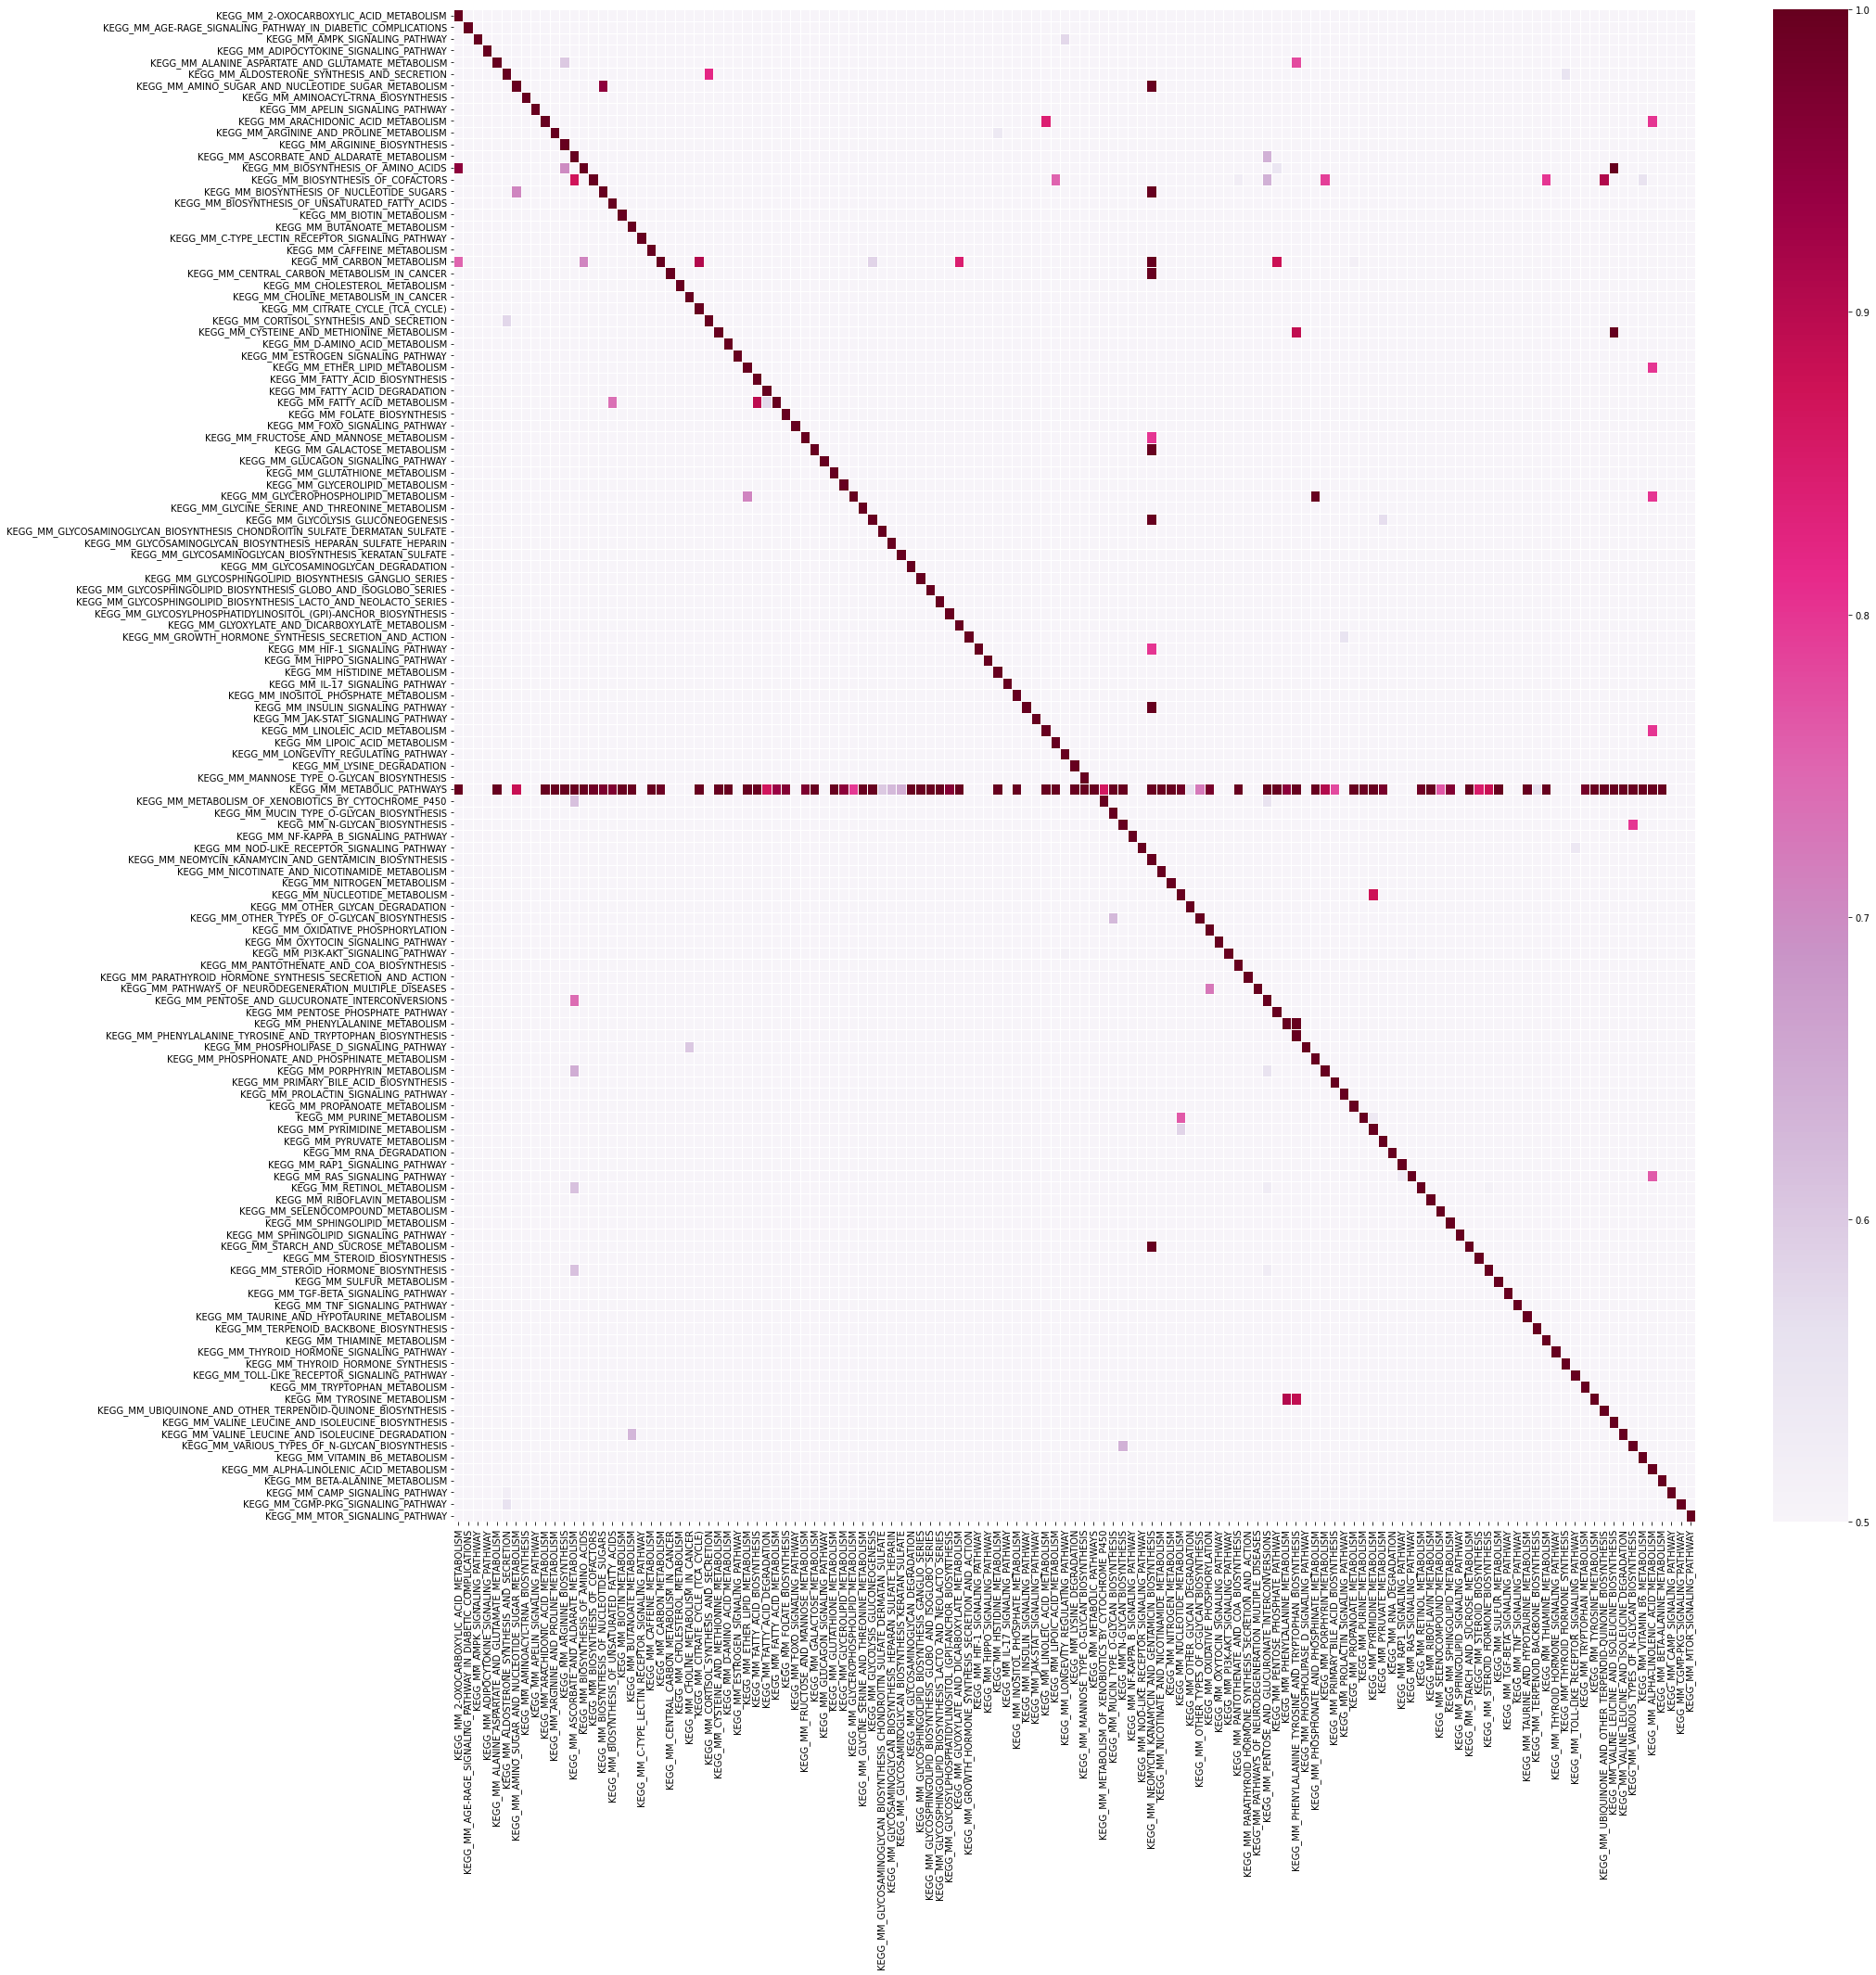

In [155]:
# exmaine similarity of gene signatures
all_d = {}
for key in metabolism_sig_mouse_2:
    d = {}
    for key2 in metabolism_sig_mouse_2:
        if key2 != key:
            overlap_items = [v for v in metabolism_sig_mouse_2[key2] if v in metabolism_sig_mouse_2[key]]
            d[key2] = len(overlap_items) / len(metabolism_sig_mouse_2[key])
        d[key] = 1
    all_d[key] = d
all_d_df = pd.DataFrame(all_d)

plt.figure(figsize = (30,30))
sns.heatmap(all_d_df, cmap = "PuRd", vmin = 0.5, linewidths = 1)

In [179]:
# save dict of metabolism terms
with open(gene_signature_dir + 'metabolism_terms_mouse_2.csv', 'w') as csv_file:
    for key, value in metabolism_sig_mouse_2.items():
        csv_file.write(key)
        for v in value:
            csv_file.write('\t' + v)
        csv_file.write('\n')

In [180]:
out_filename = gene_signature_dir + 'metabolism_terms_mouse_2.pickle'
joblib.dump(metabolism_sig_mouse_2, out_filename)

['./gene_signatures/metabolism_terms_mouse_2.pickle']